In [3]:
import kats
from kats.tsfeatures.tsfeatures import TsFeatures
from kats.consts import TimeSeriesData

In [ ]:
import pandas as pd

df=pd.read_csv("your_csv.csv")
df.head()

In [12]:
model=TsFeatures()

In [ ]:
df["Report_Date"]=pd.to_datetime(df["Report_Date"])
df["Total"] = pd.to_numeric(df["Total"])

ts_data = TimeSeriesData(df,time_col_name="Report_Date",value="Total")
print(ts_data)

In [14]:
features = model.transform(ts_data)

# Print extracted features
print(features)

c:\Users\Arth\env\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




{'length': 381, 'mean': 124.40419947506561, 'var': 15000.298565041567, 'entropy': 0.40697602342020667, 'lumpiness': 19378470.744969882, 'stability': 13468.049229570635, 'flat_spots': 38, 'hurst': 0.584500819244241, 'std1st_der': 12.337472264239874, 'crossing_points': 12, 'binarize_mean': 0.3937007874015748, 'unitroot_kpss': 1.8848828112720157, 'heterogeneity': 368.408398542921, 'histogram_mode': 64.6, 'linearity': 0.004710416513557827, 'trend_strength': 0.9925125149112562, 'seasonality_strength': 0.3635011164760671, 'spikiness': 0.476240229586284, 'peak': 2, 'trough': 3, 'level_shift_idx': 352, 'level_shift_size': 27.850000000000023, 'y_acf1': 0.9675698106597441, 'y_acf5': 3.9457139600497992, 'diff1y_acf1': 0.4289873645643884, 'diff1y_acf5': 0.24820640402007682, 'diff2y_acf1': -0.30430467148559714, 'diff2y_acf5': 0.17723608175354988, 'y_pacf5': 0.961212993572336, 'diff1y_pacf5': 0.2372916170232004, 'diff2y_pacf5': 0.278437421295306, 'seas_acf1': 0.7135214418260538, 'seas_pacf1': -0.046

In [23]:
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams() # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(ts_data, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=30, freq="MS")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='time', ylabel='y'>

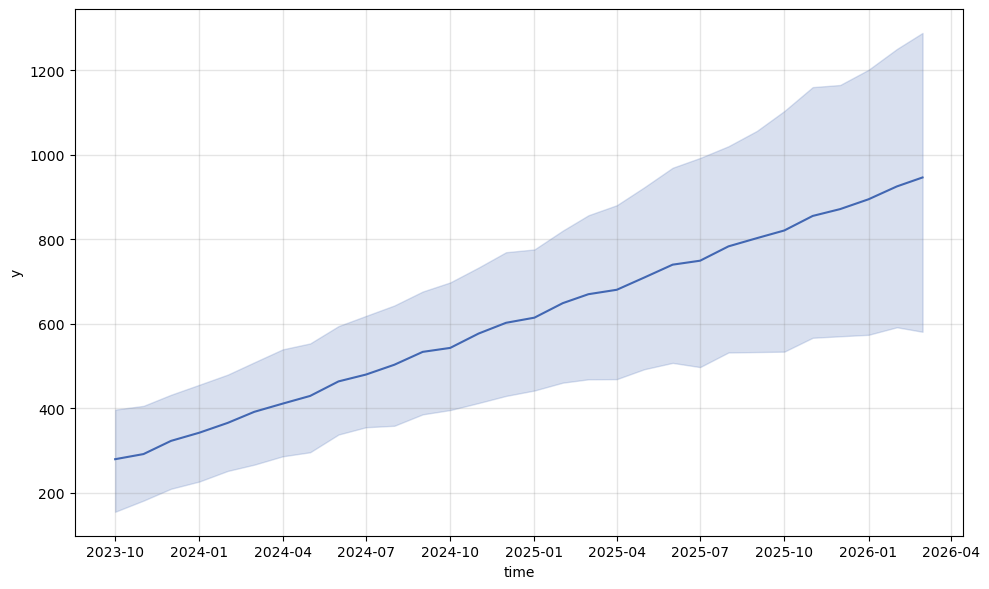

In [24]:
m.plot()

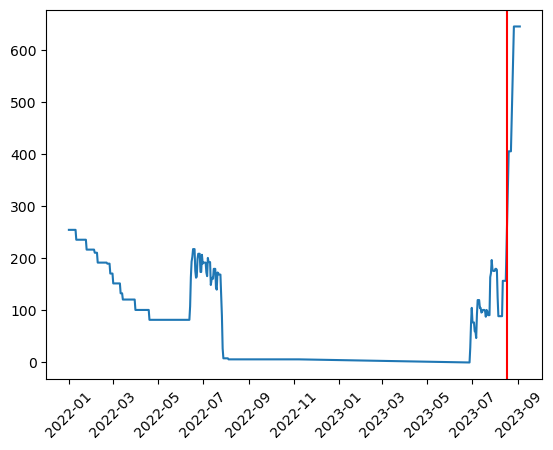

In [26]:
# import packages
from kats.consts import TimeSeriesData, TimeSeriesIterator
from kats.detectors.cusum_detection import CUSUMDetector
import matplotlib.pyplot as plt

detector = CUSUMDetector(ts_data)

# run detector
change_points = detector.detector(change_directions=["increase"])

# plot the results
detector.plot(change_points)
plt.xticks(rotation=45)
plt.show()